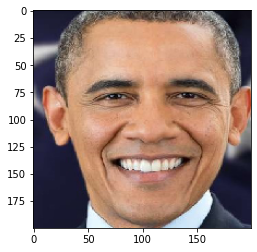

In [ ]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

img = image.load_img(r"drive/MyDrive/dataset/train/obama/1.jpg" , target_size=(200, 200))
plt.imshow(img)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        r'drive/MyDrive/dataset/train/', 
        target_size=(224, 224),  
        batch_size=128,
        class_mode='binary')

test_generator = train_datagen.flow_from_directory(
        r'drive/MyDrive/dataset/test/',
        target_size=(224, 224),  
        batch_size=128,
        class_mode='binary')

Found 142 images belonging to 2 classes.
Found 58 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'no_obama': 0, 'obama': 1}

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Conv2D,Dense,MaxPooling2D,LeakyReLU

model =Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=128, kernel_size=(3, 3), activation=LeakyReLU(alpha=0.1)),
    MaxPooling2D((2, 2)),

    Conv2D(filters=256, kernel_size=(3, 3), activation=LeakyReLU(alpha=0.1)),
    MaxPooling2D((2, 2)),
       
    Flatten(),
    Dense(64, activation='relu'),
    Dense(2, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history=model.fit(train_generator,validation_data=test_generator,epochs=200)

Epoch 1/200
2/2 [==============================] - 4s 2s/step - loss: 0.9140 - accuracy: 0.4979 - val_loss: 5.6882 - val_accuracy: 0.5000
Epoch 2/200
2/2 [==============================] - 3s 3s/step - loss: 7.4262 - accuracy: 0.5238 - val_loss: 0.4915 - val_accuracy: 0.9310
Epoch 3/200
2/2 [==============================] - 3s 810ms/step - loss: 0.4620 - accuracy: 0.9640 - val_loss: 2.9398 - val_accuracy: 0.5000
Epoch 4/200
2/2 [==============================] - 3s 803ms/step - loss: 3.1794 - accuracy: 0.4760 - val_loss: 1.3831 - val_accuracy: 0.5000
Epoch 5/200
2/2 [==============================] - 3s 801ms/step - loss: 1.2966 - accuracy: 0.4953 - val_loss: 0.5132 - val_accuracy: 0.6897
Epoch 6/200
2/2 [==============================] - 3s 803ms/step - loss: 0.4419 - accuracy: 0.7106 - val_loss: 0.4299 - val_accuracy: 0.7241
Epoch 7/200
2/2 [==============================] - 3s 803ms/step - loss: 0.3714 - accuracy: 0.7643 - val_loss: 0.2437 - val_accuracy: 0.9483
Epoch 8/200
2/2 [==

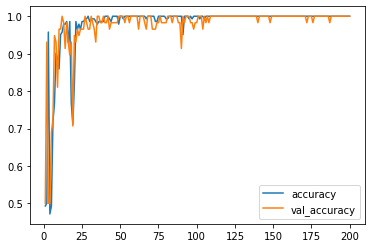

In [ ]:
plt.plot([i for i in range(1,201)],history.history['accuracy'])
plt.plot([i for i in range(1,201)],history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(model.predict_classes(test_generator),test_generator.classes)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.6206896551724138

In [ ]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open(r'/content/drive/MyDrive/model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpcrhv8e8b/assets


INFO:tensorflow:Assets written to: /tmp/tmpcrhv8e8b/assets
